In [1]:
# Step 1: Import the data
import os
import pandas as pd
import data_utility as du

# setup pathing and names for the resources that needs to be downloaded and extracted
SRC_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
DEST_ROOT = "E:\machine-learning-dataset"
TAR_FILE_NAME = "housing.tgz"
TAR_FILE_PATH = os.path.join(DEST_ROOT, TAR_FILE_NAME)
EXTRACTED_DEST_PATH = os.path.join(DEST_ROOT, "housing")
CSV_FILE = os.path.join(EXTRACTED_DEST_PATH, "housing.csv")

In [2]:
du.get_data_from_url(SRC_URL, DEST_ROOT, TAR_FILE_PATH)

In [3]:
du.extract_tarfile(TAR_FILE_PATH, EXTRACTED_DEST_PATH)

In [4]:
housing = pd.read_csv(CSV_FILE)

# see top 5 rows example code
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# quick description of the data example code
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# aggregate count example code
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# summary of numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


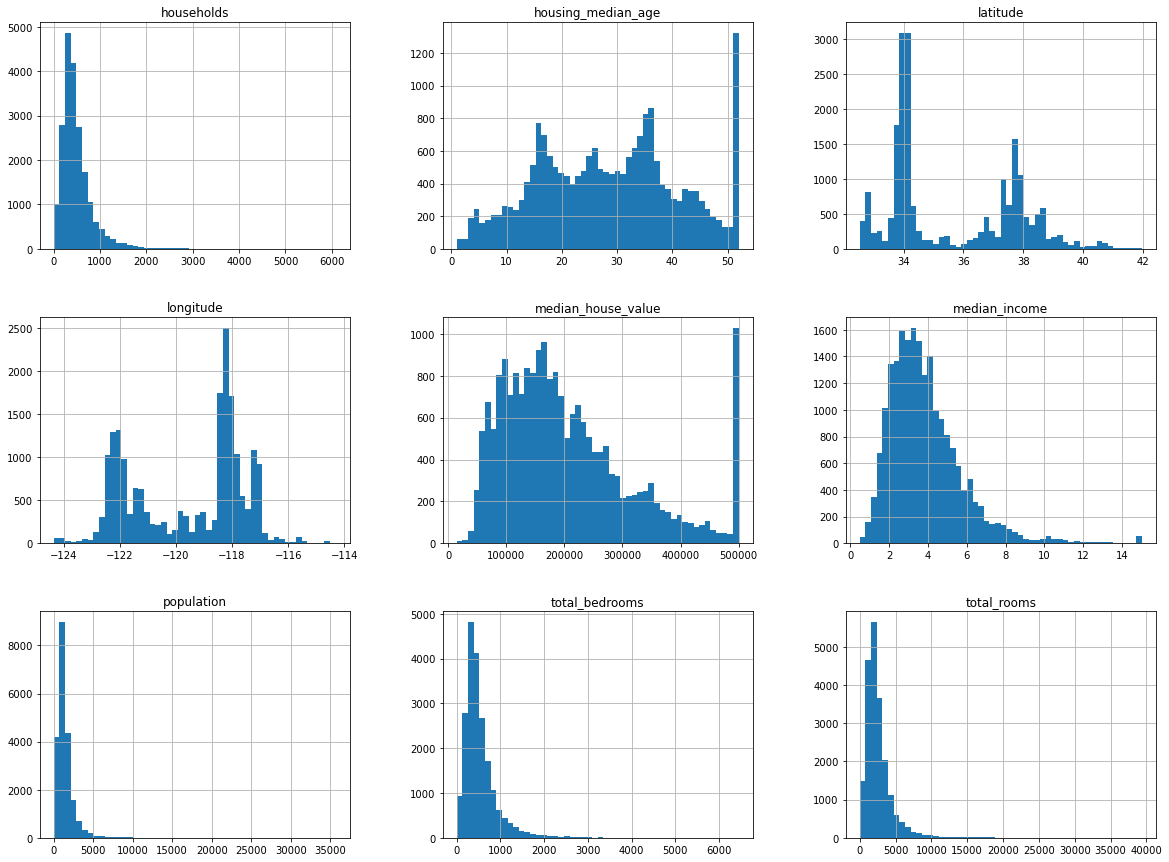

In [8]:
# STEP 2. Review the data. Check for capped values in histograms and evaluate with teams that will use your ml.
# if it does, either collect proper labels for the set whos labels are capped or remove those set.

# plot a histogram for each numerical attribute
# %matplotlib inline shows plot inside jupyter
%matplotlib inline

# create histogram. hist method is only available with matplotlib
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# this method is optional. housing.hist() showns this automatically, but it includes the array.
plt.show()

In [9]:
# Step 3: split the data into train, and test. Do not look at the test set. This is to avoid ovefitting if your brain detects pattern from the entire data set. Recommendation is to use option c) stratified method to split.

# option a) generating train, test set using random single run
train_set, test_set = du.split_train_test_single_run(housing, 0.2)
len(train_set)

4128

In [10]:
len(test_set)

16512

In [11]:
# option b-1) using the re-runable method that uses hashing off an index column
# generate an index column first
housing_with_index = housing.reset_index()
housing_with_index.head()

# the trick is to make sure new data gets appended to the end, for this hash algorithm method to work
train_set, test_set = du.split_train_test_multi_run(housing_with_index, 0.2, "index")
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
# option b-2) Alternatively use sci kit framework method
from sklearn.model_selection import train_test_split

# this is the same thing as split_train_test_single_run
# passing random_state will allow setting a random seed. 
# you can also pass it multiple data sets incase you separated the label in another dataframe
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

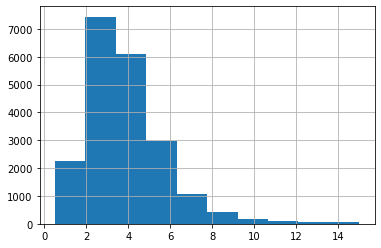

In [14]:
# option c) We however want to use strafied sampling instead of random.

# Divid einto homogenous subgrous called strata, and the right number of instances are sampled from each stratum to 
# guarantee the test is representative of the entire dataset
# we have to categorize things based on mediam_income since most people think it's an important category for predicting median house prices.
import numpy
housing["median_income"].hist()
housing["income_category"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., numpy.inf], labels=[1, 2, 3, 4, 5])

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


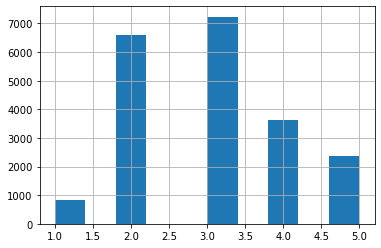

In [16]:
housing["income_category"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# n_splits = Number of re-shuffling & splitting iterations, 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# only 1 iteration instance
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 


In [18]:
#confirming the sample is as expected
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [19]:
# remove the category that created for stratify, since it's no longer needed.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [20]:
# Step 4 Visualize the data
# create a copy, so we don't affect the training set when we play with data visualization
housing = strat_train_set.copy()

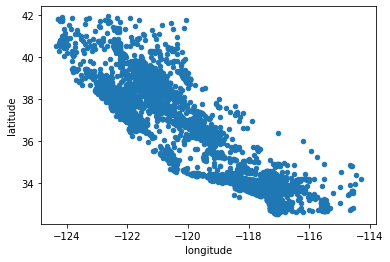

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
# the above plot looks like california but, but density isn't show well. 
# adjust by lowing the alpha to get a heatmap feel
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
# the brain is very good at splotting patterns in pictures, we just have to play with different visualization parameters to make patterns stand out
# s = radius of the circle => population
# c = color => price
# cmp = predefined colour map => jet (ranges from blue = low values to red = high values)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [ ]:
# Step 5. Look for correlations
# for none large datasets, easily compute the standard correlation coefficient (Pearson's r) between every pair of attributes using the correlatioon method:
corr_matrix = housing.corr()

In [ ]:
# example, check correlation of median_house_value with all values
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
# another way to check correlation is to visualize it all using pandas scatter_matrix() function
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)